# Trabajo Semanal 2 : Respuesta en Frecuencia de filtros pasivos RLC

A continuacion se hizo un analisis de dos circuitos propuestos:

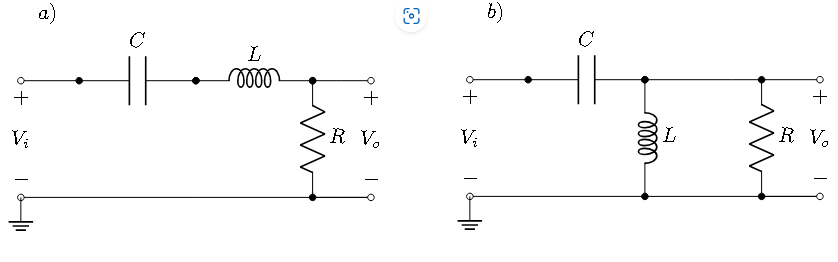

### Consigna:
    1.Hallar analíticamente la función de transferencia 
    2.Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda.
    3.Responda: ¿De qué tipo de filtro se trata? ¿Cuál es el ancho de banda del filtro?

1. Se Hallo la funcion Transferencia:

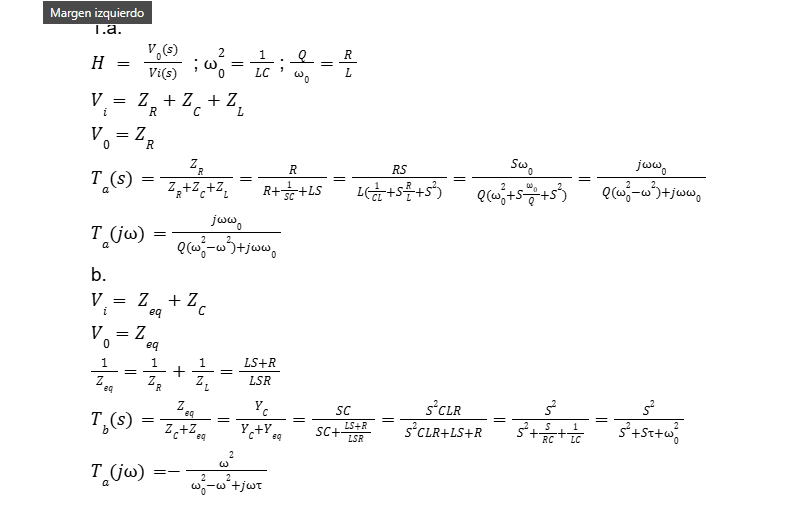

2. Se Calculo y se grafico el modulo y fase:

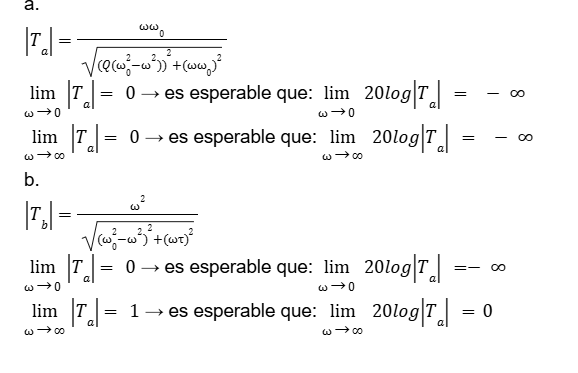

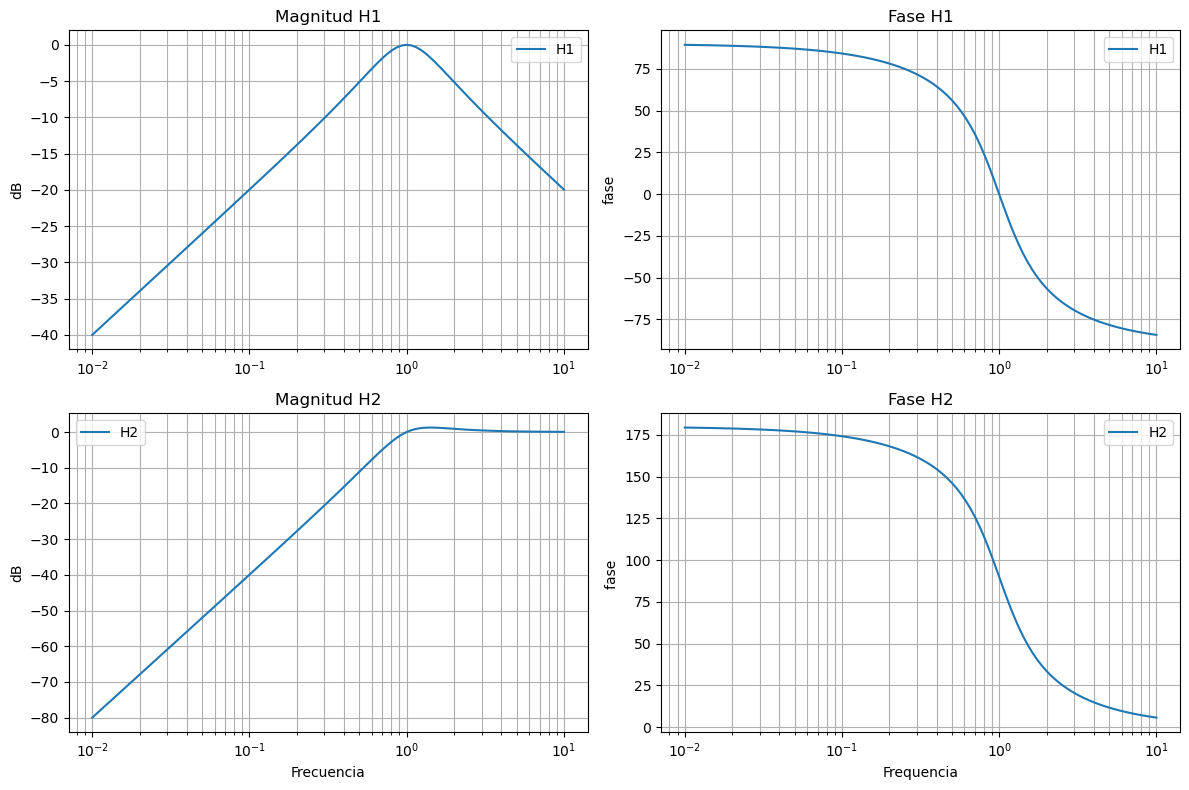

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal    


r = 1
l = 1
c= 1
t_1= 10000
tau_1= 1/r*c
omega_cuadr_1= 1/l*c
q = r/l
H1 = signal.TransferFunction([1,0],[1,q/omega_cuadr_1,omega_cuadr_1])
H2 = signal.TransferFunction([1,0,0],[1,tau_1,omega_cuadr_1])
w1,mag1,phase1 = signal.bode(H1)
w2,mag2, phase2 = signal.bode(H2)

plt.figure(figsize=(12, 8))

# Magnitud de H1
plt.subplot(2, 2, 1)
plt.semilogx(w1, mag1, label='H1')
plt.title('Magnitud H1')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H1
plt.subplot(2, 2, 2)
plt.semilogx(w1, phase1, label='H1')
plt.title('Fase H1')
plt.ylabel('fase')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H2
plt.subplot(2, 2, 3)
plt.semilogx(w2, mag2, label='H2')
plt.title('Magnitud H2')
plt.ylabel('dB')
plt.xlabel('Frecuencia')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H2
plt.subplot(2, 2, 4)
plt.semilogx(w2, phase2, label='H2')
plt.title('Fase H2')
plt.ylabel('fase ')
plt.xlabel('Frequencia')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()
plt.show()

3.a. El primer circuito, como se observa en el gráfico de magnitud, es un pasa banda. Esto es esperado, ya que posee un capacitor e inductor en serie, bloqueando las frecuencias muy bajas y atenuando las muy altas. Como resultado, la frecuencia de corte se encuentra en el pico máxima.
Luego para saber el ancho de banda se toma el ancho que este por encima de los 3dB magnitud, ya que este es el que representa informacion deseable.

3.b El segundo circuito se identifica como un filtro pasa alto, ya que su gráfico muestra una curva que va desde menos infinito hasta estabilizarse en 0 para frecuencias más altas. Esto se deduce al observar la presencia de un capacitor, que retiene el paso de frecuencias a pocos hertz. A partir de esto, podemos concluir que su ancho de banda estará definido por la frecuencia de corte, donde la magnitud es de -3 dB, y que a frecuencias más altas se atenúa la señal.

Nota: No entendi como representar la respuesta asintotica.

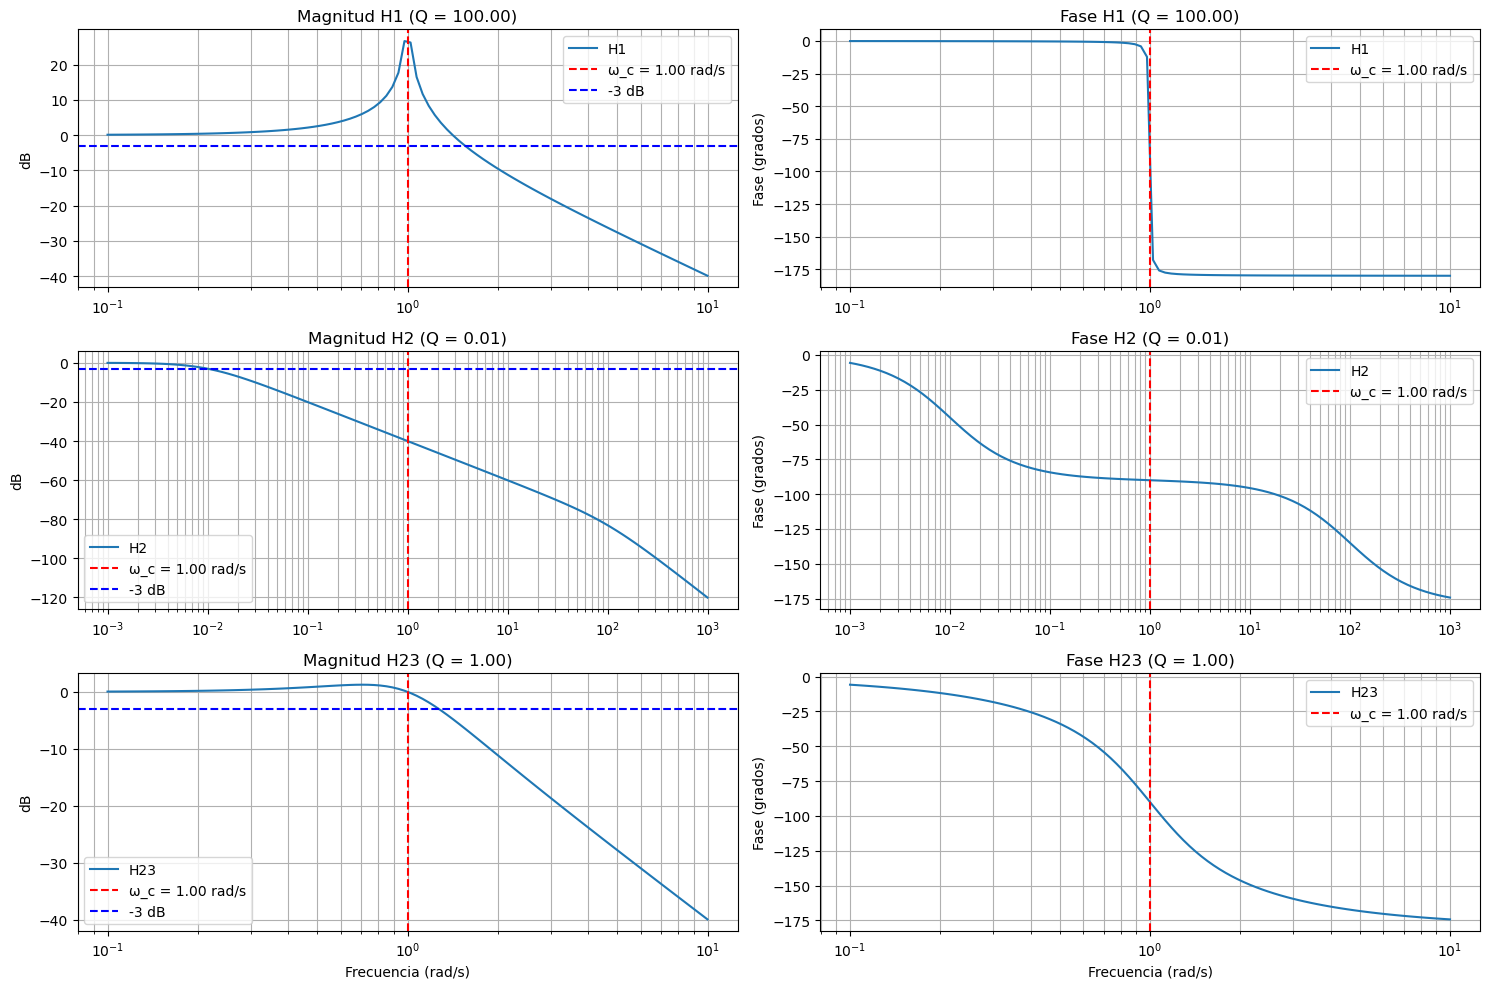

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
r = 1
l = 1
c = 1
omega_cuadr_1 = 1 / np.sqrt(l * c)

# Funciones de transferencia con sus respectivos Q
H1 = signal.TransferFunction([1], [1, 0.01, 1])  # Q = 100
H2 = signal.TransferFunction([1], [1, 100, 1])   # Q = 0.01
H23 = signal.TransferFunction([1], [1, 1, 1])    # Q = 1

# Valores de Q
Q1 = 1 / 0.01
Q2 = 1 / 100
Q3 = 1 / 1

# Respuesta en frecuencia
w1, mag1, phase1 = signal.bode(H1)
w2, mag2, phase2 = signal.bode(H2)
w3, mag3, phase3 = signal.bode(H23)

# Gráficos
plt.figure(figsize=(15, 10))

# Magnitud de H1
plt.subplot(3, 2, 1)
plt.semilogx(w1, mag1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H1 (Q = {Q1:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H1
plt.subplot(3, 2, 2)
plt.semilogx(w1, phase1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H1 (Q = {Q1:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H2
plt.subplot(3, 2, 3)
plt.semilogx(w2, mag2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H2 (Q = {Q2:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H2
plt.subplot(3, 2, 4)
plt.semilogx(w2, phase2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H2 (Q = {Q2:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H23
plt.subplot(3, 2, 5)
plt.semilogx(w3, mag3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H23 (Q = {Q3:.2f})')
plt.ylabel('dB')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H23
plt.subplot(3, 2, 6)
plt.semilogx(w3, phase3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H23 (Q = {Q3:.2f})')
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

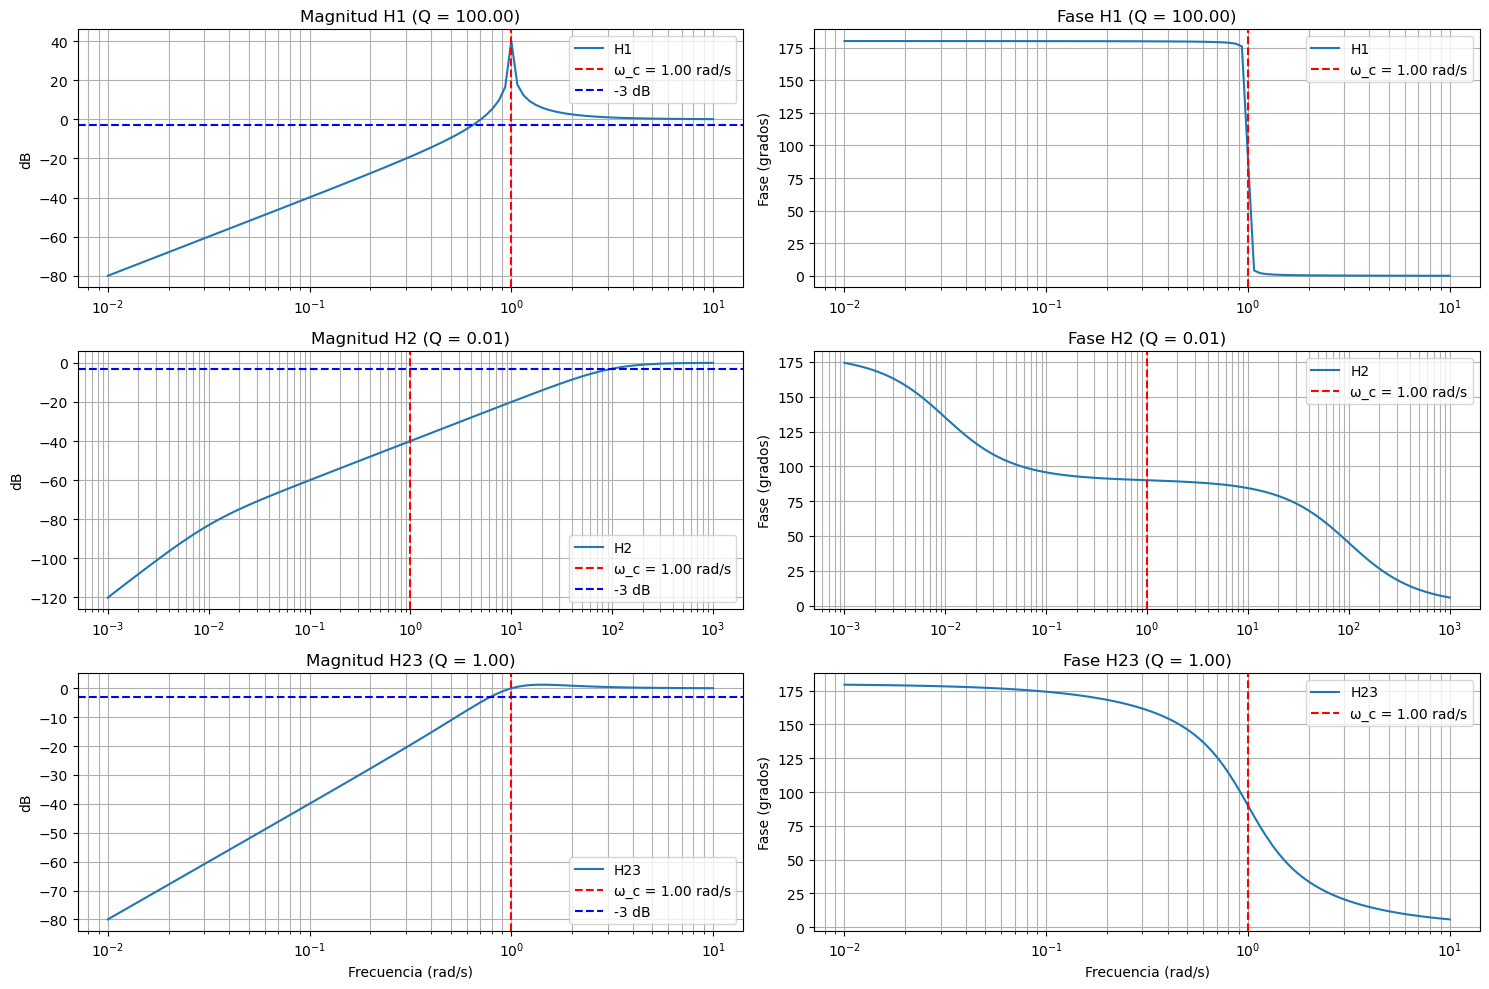

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
r = 1
l = 1
c = 1
omega_cuadr_1 = 1 / np.sqrt(l * c)

# Funciones de transferencia con sus respectivos Q
H1 = signal.TransferFunction([1,0,0], [1, 0.01, 1])  # Q = 100
H2 = signal.TransferFunction([1,0,0], [1, 100, 1])   # Q = 0.01
H23 = signal.TransferFunction([1,0,0], [1, 1, 1])    # Q = 1

# Valores de Q
Q1 = 1 / 0.01
Q2 = 1 / 100
Q3 = 1 / 1

# Respuesta en frecuencia
w1, mag1, phase1 = signal.bode(H1)
w2, mag2, phase2 = signal.bode(H2)
w3, mag3, phase3 = signal.bode(H23)

# Gráficos
plt.figure(figsize=(15, 10))

# Magnitud de H1
plt.subplot(3, 2, 1)
plt.semilogx(w1, mag1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H1 (Q = {Q1:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H1
plt.subplot(3, 2, 2)
plt.semilogx(w1, phase1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H1 (Q = {Q1:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H2
plt.subplot(3, 2, 3)
plt.semilogx(w2, mag2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H2 (Q = {Q2:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H2
plt.subplot(3, 2, 4)
plt.semilogx(w2, phase2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H2 (Q = {Q2:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H23
plt.subplot(3, 2, 5)
plt.semilogx(w3, mag3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H23 (Q = {Q3:.2f})')
plt.ylabel('dB')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H23
plt.subplot(3, 2, 6)
plt.semilogx(w3, phase3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H23 (Q = {Q3:.2f})')
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

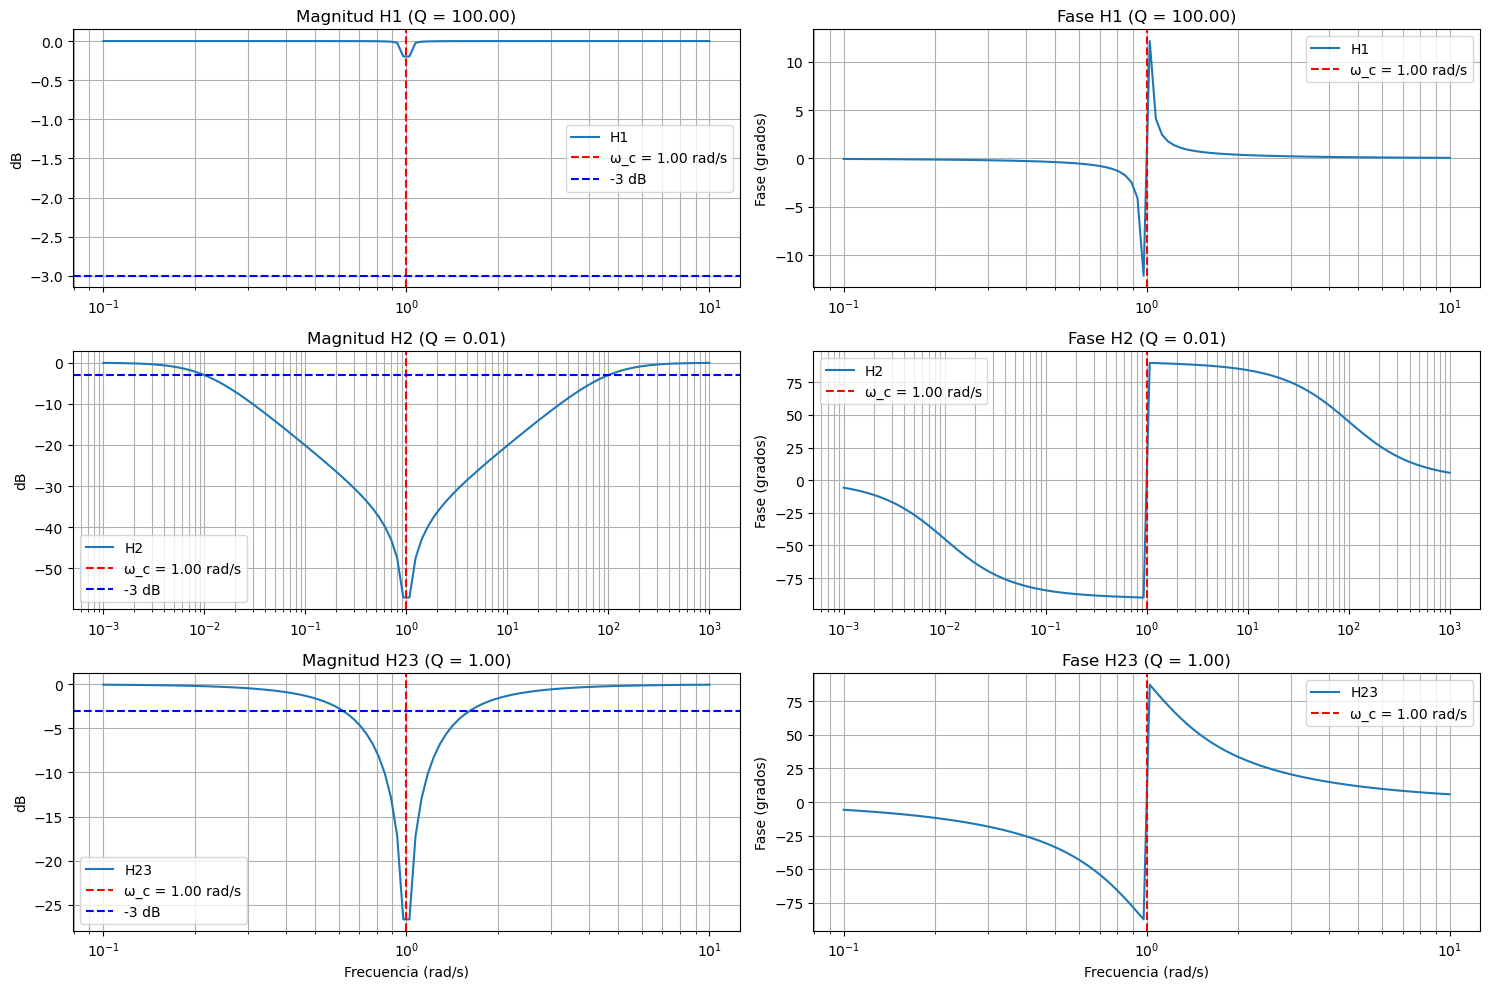

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
r = 1
l = 1
c = 1
omega_cuadr_1 = 1 / np.sqrt(l * c)

# Funciones de transferencia con sus respectivos Q
H1 = signal.TransferFunction([1,0,1], [1, 0.01, 1])  # Q = 100
H2 = signal.TransferFunction([1,0,1], [1, 100, 1])   # Q = 0.01
H23 = signal.TransferFunction([1,0,1], [1, 1, 1])    # Q = 1

# Valores de Q
Q1 = 1 / 0.01
Q2 = 1 / 100
Q3 = 1 / 1

# Respuesta en frecuencia
w1, mag1, phase1 = signal.bode(H1)
w2, mag2, phase2 = signal.bode(H2)
w3, mag3, phase3 = signal.bode(H23)

# Gráficos
plt.figure(figsize=(15, 10))

# Magnitud de H1
plt.subplot(3, 2, 1)
plt.semilogx(w1, mag1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H1 (Q = {Q1:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H1
plt.subplot(3, 2, 2)
plt.semilogx(w1, phase1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H1 (Q = {Q1:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H2
plt.subplot(3, 2, 3)
plt.semilogx(w2, mag2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H2 (Q = {Q2:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H2
plt.subplot(3, 2, 4)
plt.semilogx(w2, phase2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H2 (Q = {Q2:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H23
plt.subplot(3, 2, 5)
plt.semilogx(w3, mag3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H23 (Q = {Q3:.2f})')
plt.ylabel('dB')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H23
plt.subplot(3, 2, 6)
plt.semilogx(w3, phase3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H23 (Q = {Q3:.2f})')
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()

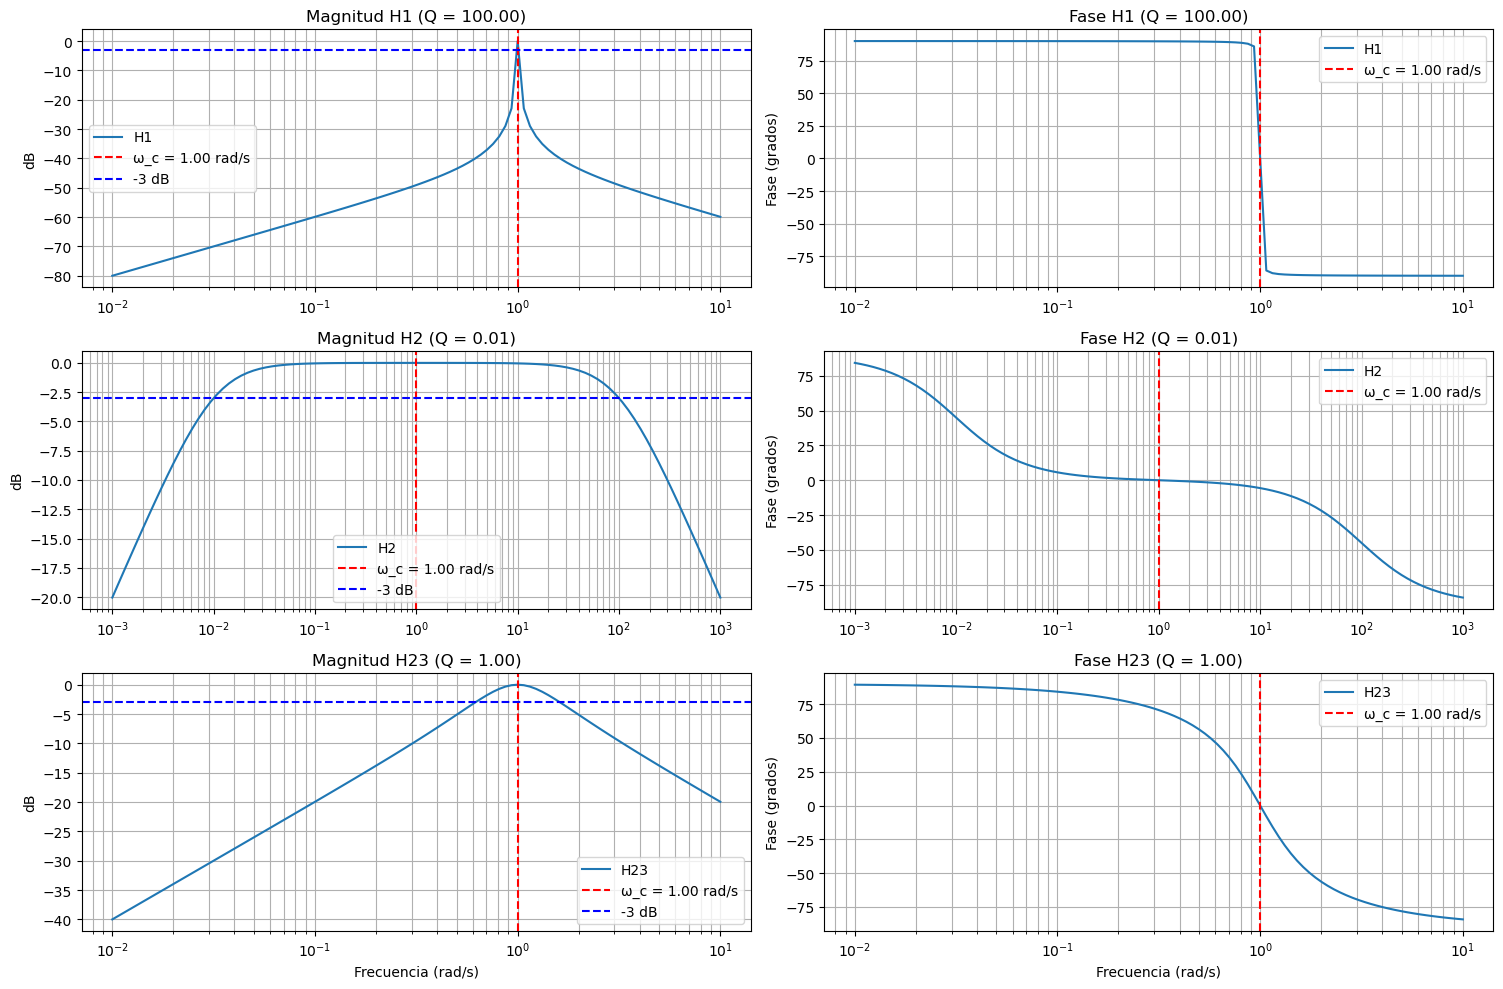

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
r = 1
l = 1
c = 1
omega_cuadr_1 = 1 / np.sqrt(l * c)

# Funciones de transferencia con sus respectivos Q
H1 = signal.TransferFunction([0.01,0], [1, 0.01, 1])  # Q = 100
H2 = signal.TransferFunction([100,0], [1, 100, 1])   # Q = 0.01
H23 = signal.TransferFunction([1,0], [1, 1, 1])    # Q = 1

# Valores de Q
Q1 = 1 / 0.01
Q2 = 1 / 100
Q3 = 1 / 1

# Respuesta en frecuencia
w1, mag1, phase1 = signal.bode(H1)
w2, mag2, phase2 = signal.bode(H2)
w3, mag3, phase3 = signal.bode(H23)

# Gráficos
plt.figure(figsize=(15, 10))

# Magnitud de H1
plt.subplot(3, 2, 1)
plt.semilogx(w1, mag1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H1 (Q = {Q1:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H1
plt.subplot(3, 2, 2)
plt.semilogx(w1, phase1, label='H1')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H1 (Q = {Q1:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H2
plt.subplot(3, 2, 3)
plt.semilogx(w2, mag2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H2 (Q = {Q2:.2f})')
plt.ylabel('dB')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H2
plt.subplot(3, 2, 4)
plt.semilogx(w2, phase2, label='H2')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H2 (Q = {Q2:.2f})')
plt.ylabel('Fase (grados)')
plt.grid(which='both', axis='both')
plt.legend()

# Magnitud de H23
plt.subplot(3, 2, 5)
plt.semilogx(w3, mag3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.axhline(-3, color='blue', linestyle='--', label='-3 dB')  # Línea de -3 dB
plt.title(f'Magnitud H23 (Q = {Q3:.2f})')
plt.ylabel('dB')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

# Fase de H23
plt.subplot(3, 2, 6)
plt.semilogx(w3, phase3, label='H23')
plt.axvline(omega_cuadr_1, color='red', linestyle='--', label=f'ω_c = {omega_cuadr_1:.2f} rad/s')
plt.title(f'Fase H23 (Q = {Q3:.2f})')
plt.ylabel('Fase (grados)')
plt.xlabel('Frecuencia (rad/s)')
plt.grid(which='both', axis='both')
plt.legend()

plt.tight_layout()
plt.show()